In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [122]:
df = pd.read_csv('C:/Users/tyagi/Desktop/greatlearn/TensorFlow_FILES/train.csv')

In [123]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [124]:
df.shape

(27481, 4)

In [125]:
df['text'].nunique()

27480

In [126]:
df['selected_text'].nunique()

22463

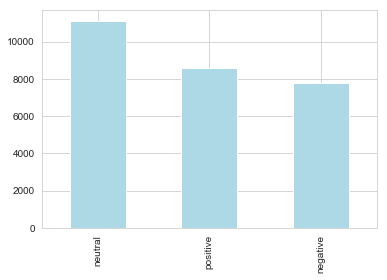

In [131]:
df['sentiment'].value_counts().plot(kind='bar',color='lightblue')

# Maximum Neutral texts

In [132]:
import nltk

In [133]:
# nltk.download_shell()  # stopwords is already installed

In [134]:
df[df['text'].isna()]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [135]:
df[df['selected_text'].isna()]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


In [136]:
# Only 1 null value, we can drop this .

In [137]:
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [138]:
df.shape

(27481, 4)

In [139]:
df.dropna(inplace=True)

In [140]:
df.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [141]:
df['text_length'] = df['text'].apply(lambda x : len(x))

In [142]:
df.head()

,textID,text,selected_text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75


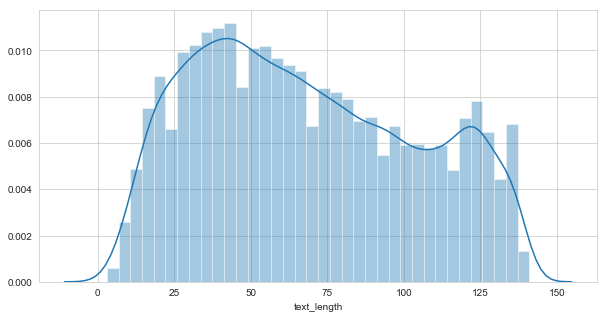

In [143]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(10,5))
sns.distplot(df['text_length'])

# normal distributed data

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 5 columns):
textID           27480 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27480 non-null object
text_length      27480 non-null int64
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [145]:
df['textID'].nunique()

27480

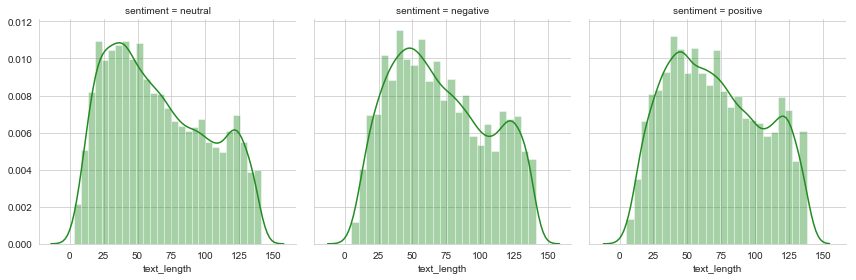

In [146]:
g = sns.FacetGrid(data=df,col='sentiment',height=4)
g.map(sns.distplot,'text_length',color='forestgreen')

In [147]:
# Removing punctuations

import string

In [148]:
from nltk.corpus import stopwords

In [149]:
df['selected_text'][4].split()

['Sons', 'of', '****,']

In [150]:
df.head()

,textID,text,selected_text,sentiment,text_length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46
2,088c60f138,my boss is bullying me...,bullying me,negative,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75


In [151]:
def sel_tex(i):
    spli = i.split()
    return spli

In [152]:
df['selected_text2'] = df['selected_text'].apply(sel_tex)

In [153]:
df.head()

,textID,text,selected_text,sentiment,text_length,selected_text2
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,"[I`d, have, responded,, if, I, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,"[Sooo, SAD]"
2,088c60f138,my boss is bullying me...,bullying me,negative,25,"[bullying, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,"[leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,"[Sons, of, ****,]"


In [154]:
from nltk.corpus import stopwords

In [155]:
import string

In [156]:
df.head()

,textID,text,selected_text,sentiment,text_length,selected_text2
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,"[I`d, have, responded,, if, I, were, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,"[Sooo, SAD]"
2,088c60f138,my boss is bullying me...,bullying me,negative,25,"[bullying, me]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,"[leave, me, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,"[Sons, of, ****,]"


In [157]:
df3 = df[1:500:2]

In [158]:
df.shape

(27480, 6)

In [159]:
df3.shape

(250, 6)

# VECTORIZATION

In [160]:
from sklearn.feature_extraction.text import CountVectorizer

In [161]:


bow_trans = CountVectorizer(analyzer=sel_tex).fit(df3['selected_text'])


from sklearn.feature_extraction.text import TfidfTransformer

#tfidf_transform = TfidfTransformer().fit(bow)

#select_tfidf = tfidf_transform.transform(bow)

from sklearn.naive_bayes import MultinomialNB


In [162]:
bow_transformed = bow_trans.transform(df3['selected_text'])

In [163]:
bow_transformed

<250x952 sparse matrix of type '<class 'numpy.int64'>'
	with 1669 stored elements in Compressed Sparse Row format>

In [164]:
tfidf_transform = TfidfTransformer().fit(bow_transformed)

In [165]:
print(tfidf_transform)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [166]:
text_tfidf = tfidf_transform.transform(bow_transformed)

In [167]:
text_tfidf.shape    # 35,177 words have been counted in tfidf.tranform.

(250, 952)

In [168]:
sentiment_detect_model = MultinomialNB().fit(text_tfidf,df3['sentiment'])

In [169]:
all_text = sentiment_detect_model.predict(text_tfidf)

In [170]:
from sklearn.metrics import confusion_matrix,classification_report

In [171]:
confusion_matrix(df3['sentiment'],all_text)

array([[ 58,   6,   0],
       [  0, 104,   0],
       [  0,   2,  80]], dtype=int64)

In [172]:
print(classification_report(df3['sentiment'],all_text))

              precision    recall  f1-score   support

    negative       1.00      0.91      0.95        64
     neutral       0.93      1.00      0.96       104
    positive       1.00      0.98      0.99        82

   micro avg       0.97      0.97      0.97       250
   macro avg       0.98      0.96      0.97       250
weighted avg       0.97      0.97      0.97       250



In [173]:
cv = CountVectorizer(analyzer=sel_tex).fit(df['selected_text'])

In [174]:
text_trans = cv.transform(df['selected_text'])

In [175]:
tfidf_transform = TfidfTransformer().fit(text_trans)

In [176]:
text_tfidf = tfidf_transform.transform(text_trans)

In [177]:
text_tfidf.shape

(27480, 32941)

In [178]:
sentiment_detect_model = MultinomialNB().fit(text_tfidf,df['sentiment'])

In [179]:
all_text2 = sentiment_detect_model.predict(text_tfidf)

In [180]:
all_text2[1:6]

array(['negative', 'negative', 'neutral', 'negative', 'neutral'],
      dtype='<U8')

In [181]:
confusion_matrix(df['sentiment'],all_text2)

array([[ 5627,  2012,   142],
       [   70, 10935,   112],
       [  101,  1432,  7049]], dtype=int64)

In [182]:
print(classification_report(df3['sentiment'],all_text))

              precision    recall  f1-score   support

    negative       1.00      0.91      0.95        64
     neutral       0.93      1.00      0.96       104
    positive       1.00      0.98      0.99        82

   micro avg       0.97      0.97      0.97       250
   macro avg       0.98      0.96      0.97       250
weighted avg       0.97      0.97      0.97       250



In [183]:
acc = round(((5672+10935+7049)/len(df))*100,2)

In [184]:
# Accuracy : 

print(f'accuracy = {acc} %')

accuracy = 86.08 %


# TEST DATA

In [185]:
df_test = pd.read_csv('C:/Users/tyagi/Desktop/greatlearn/TensorFlow_FILES/test.csv')

In [186]:
df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [187]:
df_test['text_length'] = df_test['text'].apply(lambda x : len(x))

In [188]:
def test_select(i):
    list_text = [text for text in i if text not in string.punctuation]
    join_test_text = ''.join(list_text)
    clean_test_text = [ text for text in join_test_text.split() if text.lower() not in stopwords.words('english')]
    return clean_test_text

In [189]:
df_test['selected_text'] = df_test['text'].apply(test_select)

In [190]:
bag_of_words = CountVectorizer(analyzer=test_select).fit(df_test['text'])


df_test_bow_trans = bag_of_words.transform(df_test['text'])


tfidf = TfidfTransformer().fit(df_test_bow_trans)


df_test_tfidf = tfidf.transform(df_test_bow_trans)


sentiment_detect_model = MultinomialNB().fit(df_test_tfidf,df_test['sentiment'])


all_sentiments_predictions = sentiment_detect_model.predict(df_test_tfidf)

In [191]:
print(confusion_matrix(all_sentiments_predictions,df_test['sentiment']))
print('\n')
print(classification_report(all_sentiments_predictions,df_test['sentiment']))



# ACCURACY = 91 %

[[ 814    9    3]
 [ 169 1400  111]
 [  18   21  989]]


              precision    recall  f1-score   support

    negative       0.81      0.99      0.89       826
     neutral       0.98      0.83      0.90      1680
    positive       0.90      0.96      0.93      1028

   micro avg       0.91      0.91      0.91      3534
   macro avg       0.90      0.93      0.91      3534
weighted avg       0.92      0.91      0.91      3534



In [192]:
new_messg = 'aysuh is awesome and good. he ia a nice boy'

new_messg1 = bag_of_words.transform([new_messg])

new_messg2 = tfidf.transform(new_messg1)

pred = sentiment_detect_model.predict(new_messg2)

pred

array(['positive'], dtype='<U8')